# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).



Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.



__Задание__. Необходимо выполнить два задания



1) Добейтесь accuracy **на валидации не менее 0.4**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов



2) Добейтесь accuracy **на валидации не менее 0.8**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов



Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.



Ваш код обязательно должен проходить все `assert`'ы ниже.



__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.





__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.4) / 0.4)` для второго. Оценка округляется до десятых по арифметическим правилам.





__Советы и указания__:

 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)

 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)

 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.

 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)

 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.

 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету

 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.

 - Фиксируйте random seed.

 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.

 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.

 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.



Good luck & have fun! :)

In [1]:
# from google.colab import drive

# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install wandb
# !pip3 install pytorch_lightning torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 52.4 MB/s eta 0:00:00


**✨ Внимание ✨**



В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:



1. Получить к ней доступ с помощью VPN.



2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:



```shell

git submodule update --init --recursive

make docs

```

После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).



3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉



4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [3]:
# # Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки

# import wandb

# wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [1]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.5/680.5 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.17
    Uninstalling albucore-0.0.17:
      Successfully uninstalled albucore-0.0.17
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17


In [2]:
import math

import os

import random

import sys



import matplotlib.pyplot as plt

import numpy as np

import pytorch_lightning as pl

import torch

import torchvision

import torchvision.transforms as transforms

from PIL import Image

from pytorch_lightning.loggers import WandbLogger

from torch import nn

from torch.nn import functional as F

from torch.utils.data import DataLoader

from torchmetrics.functional import accuracy

from torchvision.datasets import ImageFolder

from tqdm import tqdm

import torchvision.transforms as T

import albumentations as A

from albumentations.pytorch import ToTensorV2

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')


# You may add any imports you need

In [3]:
def seed_everything(seed):

    # Фискирует максимум сидов.

    # Это понадобится, чтобы сравнение оптимизаторов было корректным

    random.seed(seed)

    os.environ["PYTHONHASHSEED"] = str(seed)

    np.random.seed(seed)

    torch.manual_seed(seed)

    torch.cuda.manual_seed(seed)

    torch.backends.cudnn.deterministic = True





seed_everything(123456)

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
device

device(type='cuda', index=0)

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.

2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)



```

  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)



  trainer.tune(module, train_dataloader, eval_dataloader)



  trainer.fit(module, train_dataloader, eval_dataloader))

```







3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)

4. Подбор архитектуры модели.

5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:



  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`

  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)

6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)

7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.

 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)

 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [8]:
!unzip /content/drive/MyDrive/val.zip

Archive:  /content/drive/MyDrive/val.zip
   creating: val/U+1F232/
  inflating: val/U+1F232/CAACAgIAAxUAAWSdeMJVk6ExF0qcEyOmw5vZ9PYmAAIJGgACx7FJS3LIktWMNnlOLwQ.png  
   creating: val/U+1F306/
  inflating: val/U+1F306/CAACAgQAAxUAAWSdZRnGC_mrkmb323WOd3zboW1TAAJSDgACOOggURrmHI_JQqWgLwQ.png  
   creating: val/U+1F31F/
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdbbFotWMvyywebYUfpgGB_sRuAAInBAACUUr3AAGbcwwzbDLnyi8E.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdeCl6tOBADsA1zFJKOWeXJCsrAAJqBgACdwP3CzRBaapE52_lLwQ.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdobaAZ8ZdmUpeZ8ymxvpMkzOfAAJyAgACKrgoRWKO1_3r9AwzLwQ.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdobamWWNHyapY0whDcNvEufO7AAKeAgAC_dgAAUTPcG-963Nxmy8E.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdobZDarnQ7DwC3t7JWnMqBORWAAJSAgAClgIQRIcv6DRkwVmaLwQ.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdogNsv8iqixvIgV4CUbAM8EunAALGCAACyiwJRHjqIiXsJEAhLwQ.png  
  inflating: val/U+1F31F/CAACAgEAAxUAAWSdoNVX9IT58taODQc0F0_u-WAFAAJ2AgACwkJARMI-aH9eZY

In [9]:
!unzip /content/drive/MyDrive/train.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWV7jDtEsQ28oBzsbIIfVG-F4AAIlAQACMGP4EvLlgLlAuzbmLwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdW-VcOVZDoddQ5iW1Vl4j-CPUAAK9AAOz9pAOX4vVC42AyzUvBA.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWXKHRZL5D_rZ11kHD3G8qxBxAAKUSwAC6VUFGJkJit_US0owLwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWxMjGFwiQ77TqCuJvq2LnWxkAAJ6CgACxdzwSa0HZdbZGeT8LwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWxNtKj3ZyYsZMaBMFXIYLMQkAAJjDQACDGRBSe8NWWS6H50uLwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWykQQki0iGB73AWNrL_1fx8sAAK1FwAC7HPhSZ-AfkaOzCShLwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWYMyb9KMCNdQGnK7MDjoJ_y4AALUgwACns4LAAHAn3aicTB70S8E.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWYnf09AXUVY7frQ1GNGa-fkYAAJwDwACKefgS39Z6RJabCc0LwQ.png  
  inflating: train/U+1F92A/CAACAgIAAxUAAWSdWZUwZzfYDiWKIWzlfOUl9iYsAAJDGwACBff5SI3j4RQYUudZLwQ.png  
  inflating: train/U+1F

In [19]:
# # YOU CAN DEFINE AUGMENTATIONS HERE

# train_transform = T.Compose([
#     T.ColorJitter(hue=0.025, saturation=0.025), #поменяем уровень дрожания изображения и оттенков
#     T.RandomHorizontalFlip(p=0.35), #горизонтальный переворот иображения с вероятность0 0.35
#     T.RandomRotation(20), #поворот изображения на 20 градусов
#     T.ToTensor(),
#     T.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
# ])

# val_transform = T.Compose([
#     T.ToTensor(),
#     T.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
# ])



# train_dataset = ImageFolder('/content/train', transform=train_transform)

# val_dataset = ImageFolder('/content/val', transform = val_transform)

# # REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET



# train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True, pin_memory=True, num_workers=4)

# val_dataloader = DataLoader(val_dataset, batch_size = 32, shuffle = False, pin_memory=True, num_workers=4)

In [17]:
# YOU CAN DEFINE AUGMENTATIONS HERE

train_transform = T.Compose([
    T.ColorJitter(hue=0.02, saturation=0.02),
    T.RandomHorizontalFlip(),
    T.RandomRotation(20),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])



train_dataset = ImageFolder('/kaggle/input/iad-2-dataset/train/train', transform=train_transform)

val_dataset = ImageFolder('/kaggle/input/iad-2-dataset/val/val', transform = val_transform)

# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET



train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True, pin_memory=True, num_workers=4)

val_dataloader = DataLoader(val_dataset, batch_size = 32, shuffle = False, pin_memory=True, num_workers=4)

In [18]:
# Just very simple sanity checks

assert isinstance(train_dataset[0], tuple)

assert len(train_dataset[0]) == 2

assert isinstance(train_dataset[1][1], int)

print("tests passed")

tests passed


### Посмотрим на картиночки

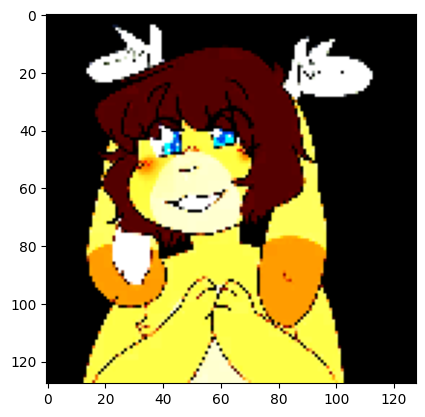

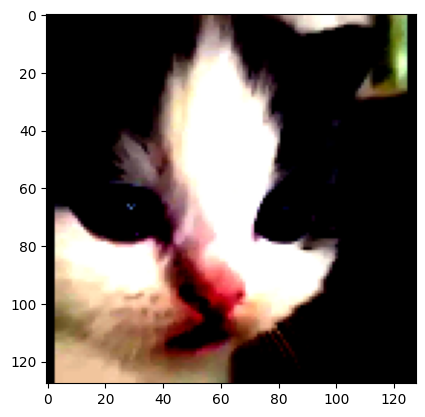

In [19]:
for batch in val_dataloader:

    images, class_nums = batch

    plt.imshow(images[5].permute(1, 2, 0))

    plt.show()

    plt.imshow(images[19].permute(1, 2, 0))

    plt.show()

    break

## Задание 1.



5 баллов

Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.





Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:

1. Аугментация (без нее сложно очень будет)

2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов

3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)

4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

Импортируем не предобученную модель

In [20]:
seed_everything(123456)



model = torchvision.models.resnet18(pretrained=False, num_classes=100).to(device)



criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 40)

In [21]:
def train_epoches(model, optimizer, criterion, train_dataset):

    train_loss = 0.0

    train_accuracy = 0.0

    model.train()

    for images, answers in tqdm(train_dataset):

        images = images.to(device)

        answers = answers.to(device)



        y_pred = model(images)

        loss = criterion(y_pred, answers)

        loss.backward()

        optimizer.step()

        optimizer.zero_grad()



        train_loss += loss.item() * images.shape[0]

        train_accuracy += (y_pred.argmax(dim=1) == answers).sum().item()

    train_loss /= len(train_dataset.dataset)

    train_accuracy /= len(train_dataset.dataset)

    return train_loss, train_accuracy

In [22]:
@torch.no_grad()

def val_epoches(model, criterion, val_dataset):

    val_loss = 0.0

    val_accuracy = 0.0

    model.eval()

    for images, answers in tqdm(val_dataset):

        images = images.to(device)

        answers = answers.to(device)



        y_pred = model(images)

        loss = criterion(y_pred, answers)



        val_loss += loss.item() * images.shape[0]

        val_accuracy += (y_pred.argmax(dim=1) == answers).sum().item()



    val_loss /= len(val_dataset.dataset)

    val_accuracy /= len(val_dataset.dataset)

    return val_loss, val_accuracy


In [23]:
def train(model, optimizer, criterion, train_dataset, val_dataset, num_of_epoches, scheduler=None):

    train_losses = []

    train_accuracies = []

    val_losses = []

    val_accuracies = []

    for epoch in range(1, num_of_epoches + 1):

        train_loss, train_accuracy = train_epoches(

            model, optimizer, criterion, train_dataset

        )

        val_loss, val_accuracy = val_epoches(

            model, criterion, val_dataset

        )

        train_losses.append(train_loss)

        train_accuracies.append(train_accuracy)

        val_losses.append(val_loss)

        val_accuracies.append(val_accuracy)



        print(f'Epoch number {epoch}')

        print(f'Train loss: {train_loss}')

        print(f'Accuracy on Train {train_accuracy}')

        print(f'Accuracy on Validation {val_accuracy}')



        if scheduler is not None:

            scheduler.step()



    return train_accuracies, val_accuracies

In [13]:
seed_everything(123456)

train_accuracies, val_accuracies = train(model, optimizer, criterion, train_dataloader, val_dataloader, 20, scheduler=scheduler)

100%|██████████| 79/79 [00:02<00:00, 26.37it/s]


Epoch number 1
Train loss: 3.6079479663512717
Accuracy on Train 0.14129409958997521
Accuracy on Validation 0.156


100%|██████████| 79/79 [00:01<00:00, 40.48it/s]


Epoch number 2
Train loss: 3.4616602147200823
Accuracy on Train 0.15758545837261823
Accuracy on Validation 0.1672


100%|██████████| 79/79 [00:01<00:00, 39.85it/s]


Epoch number 3
Train loss: 3.3617747317205895
Accuracy on Train 0.17666147740478436
Accuracy on Validation 0.172


100%|██████████| 79/79 [00:01<00:00, 42.70it/s]


Epoch number 4
Train loss: 3.2676676094726744
Accuracy on Train 0.19141798408139102
Accuracy on Validation 0.1912


100%|██████████| 79/79 [00:01<00:00, 41.66it/s]


Epoch number 5
Train loss: 3.175195749801297
Accuracy on Train 0.21117372333194465
Accuracy on Validation 0.188


100%|██████████| 79/79 [00:01<00:00, 42.79it/s]


Epoch number 6
Train loss: 3.0853939222427447
Accuracy on Train 0.22744315565593
Accuracy on Validation 0.2048


100%|██████████| 79/79 [00:01<00:00, 44.23it/s]


Epoch number 7
Train loss: 2.9974179873666293
Accuracy on Train 0.24522551362729406
Accuracy on Validation 0.2076


100%|██████████| 79/79 [00:02<00:00, 36.69it/s]


Epoch number 8
Train loss: 2.899186838798967
Accuracy on Train 0.26134146074067577
Accuracy on Validation 0.2124


100%|██████████| 79/79 [00:01<00:00, 43.61it/s]


Epoch number 9
Train loss: 2.802442935442207
Accuracy on Train 0.28322406648102266
Accuracy on Validation 0.22


100%|██████████| 79/79 [00:01<00:00, 43.76it/s]


Epoch number 10
Train loss: 2.6927731017327003
Accuracy on Train 0.3080448176814963
Accuracy on Validation 0.2256


100%|██████████| 79/79 [00:01<00:00, 43.91it/s]


Epoch number 11
Train loss: 2.5819631768456497
Accuracy on Train 0.3293134825794286
Accuracy on Validation 0.2248


100%|██████████| 79/79 [00:01<00:00, 44.52it/s]


Epoch number 12
Train loss: 2.462154635252415
Accuracy on Train 0.3567654088188217
Accuracy on Validation 0.2216


100%|██████████| 79/79 [00:01<00:00, 42.50it/s]


Epoch number 13
Train loss: 2.337421407612178
Accuracy on Train 0.3826386300348631
Accuracy on Validation 0.2312


100%|██████████| 79/79 [00:01<00:00, 44.38it/s]


Epoch number 14
Train loss: 2.189963046137963
Accuracy on Train 0.4177209638871226
Accuracy on Validation 0.2332


100%|██████████| 79/79 [00:01<00:00, 44.17it/s]


Epoch number 15
Train loss: 2.0564321224399924
Accuracy on Train 0.4486811235117416
Accuracy on Validation 0.2384


100%|██████████| 79/79 [00:01<00:00, 44.58it/s]


Epoch number 16
Train loss: 1.906411515834428
Accuracy on Train 0.4876225140877497
Accuracy on Validation 0.2428


100%|██████████| 79/79 [00:01<00:00, 44.55it/s]


Epoch number 17
Train loss: 1.7670130980760528
Accuracy on Train 0.5216085250071261
Accuracy on Validation 0.2464


100%|██████████| 79/79 [00:01<00:00, 44.14it/s]


Epoch number 18
Train loss: 1.6229780693960887
Accuracy on Train 0.556340035520863
Accuracy on Validation 0.2416


100%|██████████| 79/79 [00:02<00:00, 36.38it/s]


Epoch number 19
Train loss: 1.4835801602983443
Accuracy on Train 0.5947113381717719
Accuracy on Validation 0.2432


100%|██████████| 79/79 [00:01<00:00, 43.61it/s]

Epoch number 20
Train loss: 1.3524008932561555
Accuracy on Train 0.6324248470629509
Accuracy on Validation 0.2444


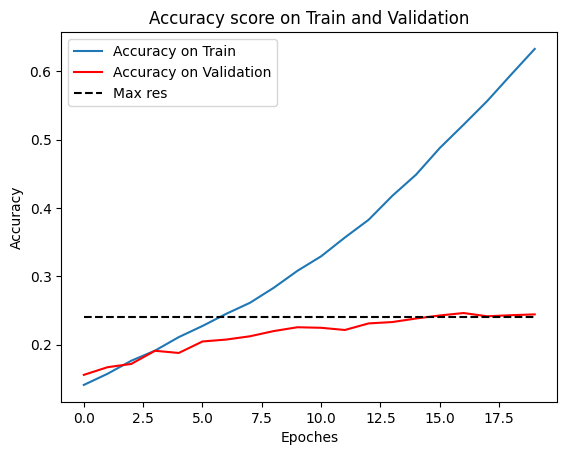

In [14]:
y = [0.24 for i in range(20)]

plt.plot(train_accuracies, label = 'Accuracy on Train')

plt.plot(val_accuracies, label = 'Accuracy on Validation', color='red')

plt.plot(y, linestyle='dashed', color='black', label = 'Max res')

plt.xlabel('Epoches')

plt.ylabel('Accuracy')

plt.title('Accuracy score on Train and Validation')

plt.legend()

plt.show()

На графие можно заметить, что модель переобучился.

In [ ]:
class YourNet(torch.nn.Module):

    def __init__(self):

        super().__init__()

        # YOUR CODE HERE

        pass



    def _forward(self, x):

        # runs the Neural Network

        # YOUR CODE HERE

        pass



    def forward(self, images, target=None):

        # YOUR CODE HERE

        pass



    def get_accuracy(self, reset=False):

        # YOUR CODE HERE

        pass

### Тренировочный класс lightning

In [ ]:
class YourModule(pl.LightningModule):

    def __init__(self, model, learning_rate):

        super().__init__()

        # YOUR CODE HERE

        pass



    def forward(self, x):

        # YOUR CODE HERE

        pass



    def configure_optimizers(self):

        # YOUR CODE HERE

        pass



    def training_step(self, train_batch, batch_idx):

        # YOUR CODE HERE

        pass



    def validation_step(self, val_batch, batch_idx):

        # YOUR CODE HERE

        pass

In [ ]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

device = # YOUR CODE HERE



model = YourNet().to() # YOUR CODE HERE

module = YourModule() # YOUR CODE HERE

In [ ]:
trainer = pl.Trainer(logger=wandb_logger)  # YOUR CODE HERE

trainer.fit()  # YOUR CODE HERE

### Валидация результатов задания

Чуть-чуть поменял код, чтобы не писать класс(((

In [15]:
def evaluate_task_new(model, test_dataloader, criterion, device="cuda:0"):
    model.eval()
    total_correct = 0.0

    for images, answers in tqdm(test_dataloader):
        images = images.to(device)
        answers = answers.to(device)
        with torch.no_grad():
            y_pred = model(images)
            loss = criterion(y_pred, answers)
            total_correct += (y_pred.argmax(dim=1) == answers).sum().item()
    

    accuracy = total_correct / len(test_dataloader.dataset)
    return accuracy

In [23]:
seed_everything(123456)

accuracy = evaluate_task_new(model, val_dataloader, criterion,device="cuda:0")

print(f"Оценка за это задание составит {np.clip(5 * accuracy / 0.24, 0, 5):.2f} баллов")
print(accuracy)

100%|██████████| 79/79 [00:01<00:00, 41.05it/s]

Оценка за это задание составит 5.00 баллов
0.2444


Правильно написал функцию, так как тоже accuracy = 0.2444

In [42]:
# def evaluate_task(model, test_dataloader, device="cuda:0"):

#     model = model.to(device)

#     model.eval()

#     accuracy = 0.0

#     for images, labels in tqdm(test_dataloader):

#         images, labels = images.to(device), labels.to(device)

#         with torch.no_grad():

#             loss = model(images, labels)

#             acc_batch = model.get_accuracy(reset=True)

#         accuracy += acc_batch

#     accuracy = accuracy / len(test_dataloader)

#     return accuracy

In [44]:
# accuracy = evaluate_task(model, val_dataloader)

# print(f"Оценка за это задание составит {np.clip(5 * accuracy / 0.24, 0, 5):.2f} баллов")

## Задание 2



5 баллов

Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.



Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:

1. Аугментация (без нее сложно очень будет)

2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.

3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).

4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.

5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [14]:
# YOU CAN DEFINE AUGMENTATIONS HERE

train_transform_2 = T.Compose([
    T.ColorJitter(hue=0.02, saturation=0.02),
    T.RandomHorizontalFlip(),
    T.RandomRotation(20),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    
])

val_transform_2 = T.Compose([
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])



train_dataset_new = ImageFolder('/kaggle/input/iad-2-dataset/train/train', transform=train_transform_2)

val_dataset_new = ImageFolder('/kaggle/input/iad-2-dataset/val/val', transform = val_transform_2)

# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET



train_dataloader_new = DataLoader(train_dataset_new, batch_size = 32, shuffle = True, pin_memory=True, num_workers=4)

val_dataloader_new = DataLoader(val_dataset_new, batch_size = 32, shuffle = False, pin_memory=True, num_workers=4)

In [15]:
seed_everything(123456)



model_new = torchvision.models.resnet50(pretrained=True)

model_new.fc = torch.nn.Linear(model_new.fc.in_features, 100) # так как я включил претрейн, нужно слой добавить так как он без нового слоя будет прогназировать 1000 классов
model_new.to(device)

criterion_new = nn.CrossEntropyLoss()

optimizer_new = torch.optim.Adam(model_new.parameters(), lr=0.0001)

scheduler_new = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_new, 10)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 124MB/s] 


In [19]:
seed_everything(123456)

train_accuracies_new, val_accuracies_new = train(model_new, optimizer_new, criterion_new, train_dataloader_new, val_dataloader_new, 12, scheduler=scheduler_new)

100%|██████████| 79/79 [00:02<00:00, 28.83it/s]


Epoch number 1
Train loss: 3.2818848747223974
Accuracy on Train 0.20183305194378057
Accuracy on Validation 0.2572


100%|██████████| 79/79 [00:02<00:00, 28.97it/s]


Epoch number 2
Train loss: 2.8516200649157257
Accuracy on Train 0.2872146819567172
Accuracy on Validation 0.2896


100%|██████████| 79/79 [00:02<00:00, 29.04it/s]


Epoch number 3
Train loss: 2.5674221254271763
Accuracy on Train 0.34716161992676564
Accuracy on Validation 0.3208


100%|██████████| 79/79 [00:02<00:00, 27.16it/s]


Epoch number 4
Train loss: 2.2899343274352577
Accuracy on Train 0.40625342600916525
Accuracy on Validation 0.3308


100%|██████████| 79/79 [00:02<00:00, 29.10it/s]


Epoch number 5
Train loss: 1.9708557402888702
Accuracy on Train 0.48051834148266714
Accuracy on Validation 0.3476


100%|██████████| 79/79 [00:02<00:00, 28.97it/s]


Epoch number 6
Train loss: 1.637072700970289
Accuracy on Train 0.563290722915342
Accuracy on Validation 0.352


100%|██████████| 79/79 [00:02<00:00, 27.18it/s]


Epoch number 7
Train loss: 1.2965458744773084
Accuracy on Train 0.6502729844102879
Accuracy on Validation 0.346


100%|██████████| 79/79 [00:02<00:00, 26.89it/s]


Epoch number 8
Train loss: 1.0065760618055266
Accuracy on Train 0.730172999758809
Accuracy on Validation 0.3528


100%|██████████| 79/79 [00:02<00:00, 29.34it/s]


Epoch number 9
Train loss: 0.8092806693282075
Accuracy on Train 0.787159865810073
Accuracy on Validation 0.3584


100%|██████████| 79/79 [00:02<00:00, 28.89it/s]


Epoch number 10
Train loss: 0.7062102745757999
Accuracy on Train 0.815269585809196
Accuracy on Validation 0.3556


100%|██████████| 79/79 [00:03<00:00, 25.82it/s]


Epoch number 11
Train loss: 0.6844128997396941
Accuracy on Train 0.825333830333063
Accuracy on Validation 0.3572


100%|██████████| 79/79 [00:02<00:00, 28.99it/s]

Epoch number 12
Train loss: 0.6887455067941028
Accuracy on Train 0.8204223035937466
Accuracy on Validation 0.3604


Нарисуем график

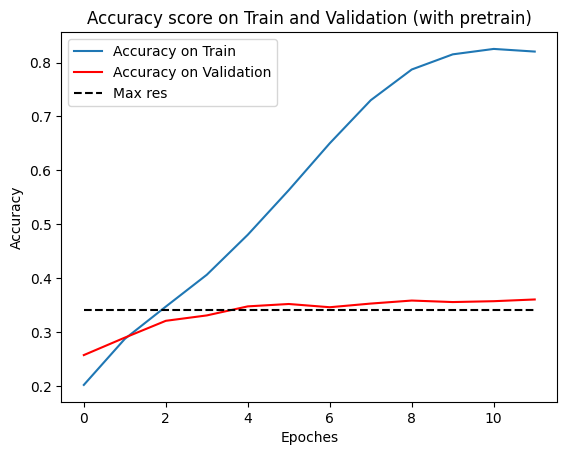

In [21]:
y_new = [0.34 for i in range(12)]

plt.plot(train_accuracies_new, label = 'Accuracy on Train')

plt.plot(val_accuracies_new, label = 'Accuracy on Validation', color='red')

plt.plot(y_new, linestyle='dashed', color='black', label = 'Max res')

plt.xlabel('Epoches')

plt.ylabel('Accuracy')

plt.title('Accuracy score on Train and Validation (with pretrain)')

plt.legend()

plt.show()

Видно очень сильное переобучение.

In [ ]:
class YourNet(torch.nn.Module):

    def __init__(self):

        super().__init__()

        # YOUR CODE HERE

        pass



    def _forward(self, x):

        # runs the Neural Network

        # YOUR CODE HERE

        pass



    def forward(self, images, target=None):

        # YOUR CODE HERE

        pass



    def get_accuracy(self, reset=False):

        # YOUR CODE HERE

        pass

### Тренировочный класс lightning

In [ ]:
class YourModule(pl.LightningModule):

    def __init__(self, model, learning_rate):

        super().__init__()

        # YOUR CODE HERE

        pass



    def forward(self, x):

        # YOUR CODE HERE

        pass



    def configure_optimizers(self):

        # YOUR CODE HERE

        pass



    def training_step(self, train_batch, batch_idx):

        # YOUR CODE HERE

        pass



    def validation_step(self, val_batch, batch_idx):

        # YOUR CODE HERE

        pass

In [ ]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

device =  # YOUR CODE HERE



model = YourNet().to() # YOUR CODE HERE

module = YourModule() # YOUR CODE HERE

In [ ]:
trainer = pl.Trainer(logger=wandb_logger)  # YOUR CODE HERE

trainer.fit()  # YOUR CODE HERE

### Валидация результатов задания

In [26]:
accuracy_new = evaluate_task_new(model_new, val_dataloader_new, criterion_new,device=device)

print(f"Оценка за это задание составит {np.clip(5 * (accuracy_new - 0.24) / 0.1, 0, 5):.2f} баллов")
print(accuracy_new)

100%|██████████| 79/79 [00:02<00:00, 28.59it/s]

Оценка за это задание составит 5.00 баллов
0.3604


# Отчёт об экспериментах



текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

1. Отчет для *первого задания*. В начале я никак не использовал аугментацию, и использовал датасет в сухую. Оптимайзер, модель и шкедулер были такие же, какие же сейчас. За 30 эпох у меня максимальное значение accuracy был равен 0.22. Главная проблема была в том, что нейросеть очень быстро переобучался из-за этого на 20 эпохе дошел около 0.2 и просто на этом уровне шатался. В целом неплохо, но надо улучшать дальше модели и обработку фоток. На второй раз я в оптимайзер решил засунуть weight_decay, чтобы побороться с переобучением. Но как итог модель начал обучатьяс намного хуже хотя значение гиперпараметра был равен все лишь 0.1. На третий раз убрал weight_decay и решил использовать аугментацию. Все методы были использованы исходя из советов семинаров. Аугументация очень сильно помогла выбить заветные 0.24. Все такие без агументации не обойтись. Но я потом остановил и уменьшил до 20 эпох, чтобы чтобы долго не ждал и не было смысла брать такое большое количество эпох. А ну и нашет lr. Он у меня изначально был маленьким, потому что я сильно боюсь перепрыгнуть хороший локальный минимум. Также хотелось бы объяснить почему Т макс 40 у шкедулера, это для того, чтобы он просто убывал и под конец возрастал (когда у меня был 30 эпох), чтобы я лучше понимал, что происходит с моделью (он остался в плохом локальном минимуме или как)

2. Отчет для *второго задания*. Все аугментации сохранил. Также на тот момент у меня был resnet18 и те же оптимайзер и шкедулер (но Т макс был снижен до 10) что и во первом задании. Но я решил уменьшить количество эпох до 12, так как с перетрейном хорошое качество выбиваться на первых эпохах, дальше идет простое переобучение. На первой попытке у меня максимальное accuracy был равен 0.30, что достаточно неплохо. Потом решил использовать заветный РЕСАЙЗ, думая что он улучшит качество, но в итоге у меня на начальных эпохах accuracy упал до 0.16. Как уже понятно, дальше я ни разу не использовал ресайз. В конце решил просто так использовать resnet50 (хотя ни на что хорошее не надеялся, так как он быстро бы переобучился). В итоге на 12 эпохах но дал accuracy аж 0.36!!! (хоть и с большим переобучением). На этом мои эксперементы закончились. Были мысли заморозить только определенные слои и/или использовать dropout/batch_normalize, но resnet50 и так выбил отличный результат, поэтому дальше я экспереминтировать не стал.

(Сорри за большой текст, просто wandb юзать (и разобраться с ним) я не хотел, поэтому решил написать развернутый отчет)